# NBA Players selection using Machine Learning

### Project Description

<p>
Consider that I am having a basketball team and want to select some good players for my team. I would like to perform the following;

<br>

* <b>Machine Learning Model 1:</b> Classifying the players who will be staying with the league for more than 5 years or less than that. <br>
* <b>Machine Learning Model 2:</b> Considering the players who are good as input, will be predicting their position in the basketball court. <br>
* <b>Machine Learning Model 3:</b> Based on the above outputs, this model will predict their salaries.<br>

* <b>Web App:</b> Building a web app using Angular as front end and Python REST as back end, in which the user or the coach has to load the csv file containing the player’s history and this system will run the input through all these models and will  finalize the players list who are required for the team with their respective salaries and positions in the basketball court.
</p>

### Data

Data for the above mentioned machine learning models are being collected from the following sites;

* https://data.world/
* https://www.basketball-reference.com/
* https://www.kaggle.com/felixdonovan/predicting-the-all-nba-teams/data

The collected data undergoes the following data preparation steps such as cleaning, standardization, missing value imputation and et cetera.

### Data Loading and Preprorcessing, Descriptive Statistics, Visualisation and Machine Learning model building

#### Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_score, recall_score, f1_score
from sklearn.feature_selection import VarianceThreshold
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
from sklearn.multiclass import OneVsRestClassifier
import pickle

## for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

%matplotlib inline

## With Model 1 Data

In [2]:
ml_Model_1_Data = pd.read_csv("Data/nba_Longevity.csv")
ml_Model_1_Data.rename(columns ={"MIN":"MP","FGM":"FG","3P Made":"3P","FTM":"FT","OREB":"ORB","DREB":"DRB","REB":"TRB"},inplace=True)
ml_Model_1_Data.columns

Index(['Name', 'GP', 'MP', 'PTS', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'FT',
       'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV',
       'TARGET_5Yrs'],
      dtype='object')

In [3]:
ml_Model_1_Data['TARGET_5Yrs'] = ml_Model_1_Data['TARGET_5Yrs'].astype('int64')
ml_Model_1_Data

Name  GP    MP  PTS   FG  FGA   FG%   3P  3PA   3P%  ...  \
0      Brandon Ingram  36  27.4  7.4  2.6  7.6  34.7  0.5  2.1  25.0  ...   
1     Andrew Harrison  35  26.9  7.2  2.0  6.7  29.6  0.7  2.8  23.5  ...   
2      JaKarr Sampson  74  15.3  5.2  2.0  4.7  42.2  0.4  1.7  24.4  ...   
3         Malik Sealy  58  11.6  5.7  2.3  5.5  42.6  0.1  0.5  22.6  ...   
4         Matt Geiger  48  11.5  4.5  1.6  3.0  52.4  0.0  0.1   0.0  ...   
...               ...  ..   ...  ...  ...  ...   ...  ...  ...   ...  ...   
1335      Chris Smith  80  15.8  4.3  1.6  3.6  43.3  0.0  0.2  14.3  ...   
1336      Brent Price  68  12.6  3.9  1.5  4.1  35.8  0.1  0.7  16.7  ...   
1337     Marlon Maxey  43  12.1  5.4  2.2  3.9  55.0  0.0  0.0   0.0  ...   
1338  Litterial Green  52  12.0  4.5  1.7  3.8  43.9  0.0  0.2  10.0  ...   
1339        Jon Barry  47  11.7  4.4  1.6  4.4  36.9  0.4  1.3  33.3  ...   

      FTA   FT%  ORB  DRB  TRB  AST  STL  BLK  TOV  TARGET_5Yrs  
0     2.3  69.9  0.7  3.4  4.1  1.9  0.4  0.4  1.3            0  
1     3.4  76.5  0.5  2.0  2.4  3.7  1.1  0.5  1.6            0  
2     1.3  67.0  0.5  1.7  2.2  1.0  0.5  0.3  1.0            0  
3     1.3  68.9  1.0  0.9  1.9  0.8  0.6  0.1  1.0            1  
4     1.9  67.4  1.0  1.5  2.5  0.3  0.3  0.4  0.8            1  
...   ...   ...  ...  ...  ...  ...  ...  ...  ...          ...  
1335  1.5  79.2  0.4  0.8  1.2  2.5  0.6  0.2  0.8            0  
1336  1.0  79.4  0.4  1.1  1.5  2.3  0.8  0.0  1.3            1  
1337  1.6  64.3  1.5  2.3  3.8  0.3  0.3  0.4  0.9            0  
1338  1.8  62.5  0.2  0.4  0.7  2.2  0.4  0.1  0.8            1  
1339  1.0  67.3  0.2  0.7  0.9  1.4  0.7  0.1  0.9            1  

[1340 rows x 21 columns]

In [4]:
#Checking for missing values
ml_Model_1_Data.isna().sum()

Name            0
GP              0
MP              0
PTS             0
FG              0
FGA             0
FG%             0
3P              0
3PA             0
3P%            11
FT              0
FTA             0
FT%             0
ORB             0
DRB             0
TRB             0
AST             0
STL             0
BLK             0
TOV             0
TARGET_5Yrs     0
dtype: int64

In [5]:
len(ml_Model_1_Data.index)

1340

In [6]:
ml_Model_1_Data = ml_Model_1_Data.dropna()

In [7]:
#Imputing Missing values
ml_Model_1_Data = ml_Model_1_Data.fillna(ml_Model_1_Data.mean())
ml_Model_1_Data.isna().sum()

Name           0
GP             0
MP             0
PTS            0
FG             0
FGA            0
FG%            0
3P             0
3PA            0
3P%            0
FT             0
FTA            0
FT%            0
ORB            0
DRB            0
TRB            0
AST            0
STL            0
BLK            0
TOV            0
TARGET_5Yrs    0
dtype: int64

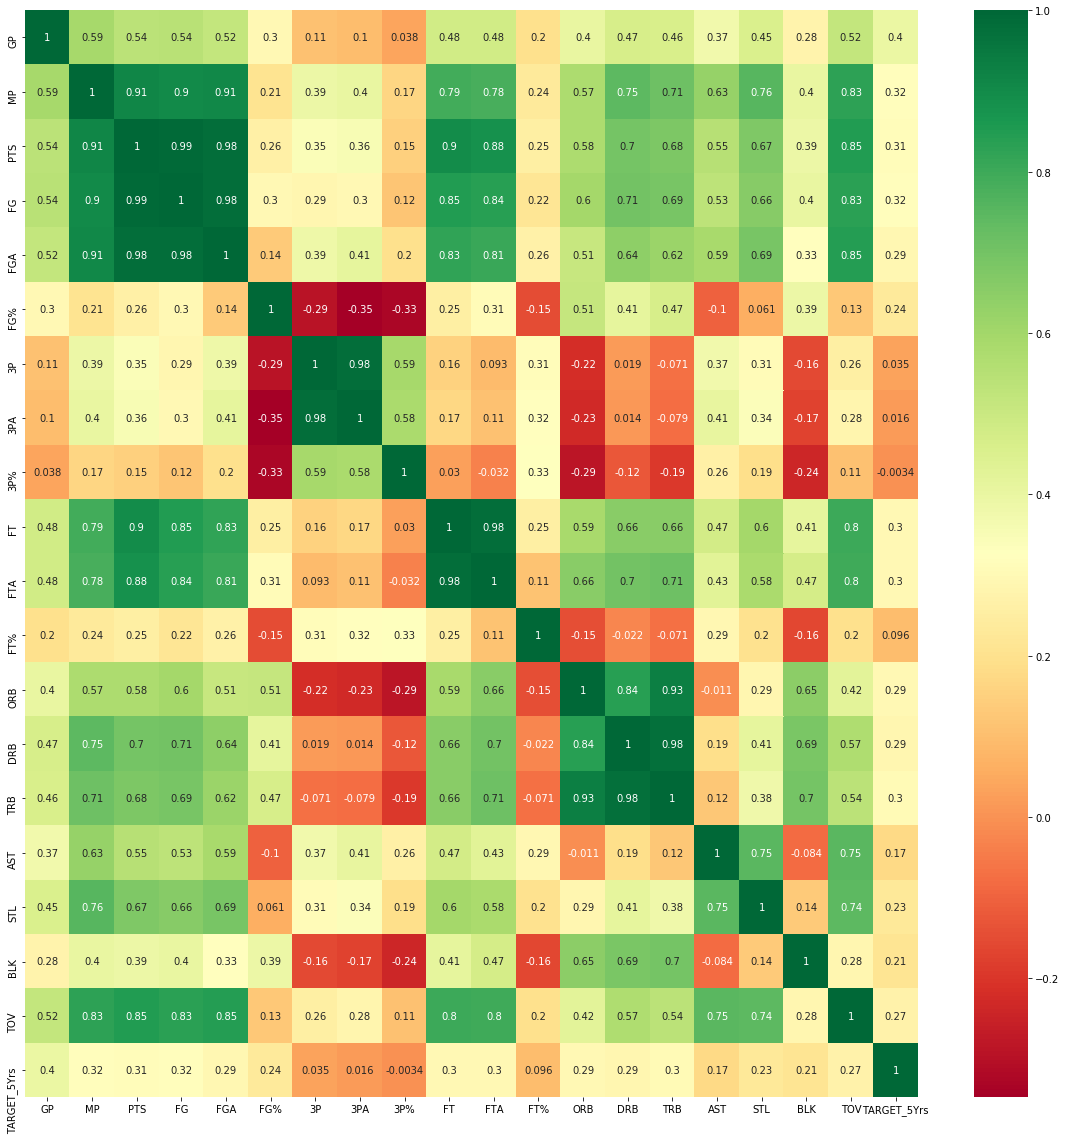

In [8]:
#Feature selection
correlation_Matrix_1 = ml_Model_1_Data.corr()
features_1 = correlation_Matrix_1.index
plt.figure(figsize=(20,20))
ml_1_data_heatMap = sns.heatmap(ml_Model_1_Data[features_1].corr(),annot=True,cmap="RdYlGn")

<p>
    From the above correlation heatmap last row, we could see that <b>GP (Games Played)</b> is correlated well with the target variable followed by <b>MP (Minutes Played), PTS (Points), FG (Field Goals), etc.</b>, but features such as <b>3P (3-Point Field Goals), 3PA (3-Point Field Goal Attempts)</b> and <b>3P% (3-Point Field Goal Percentage)</b> are less or negative correlated with target variable. The above mentioned highly correlated features might decrease the performance of classification algorithms. 
</p>
<br>
<p>
    But, I would like to run the classification algorithms with all features and only with selected features, compare their performance and select the model.
</p>

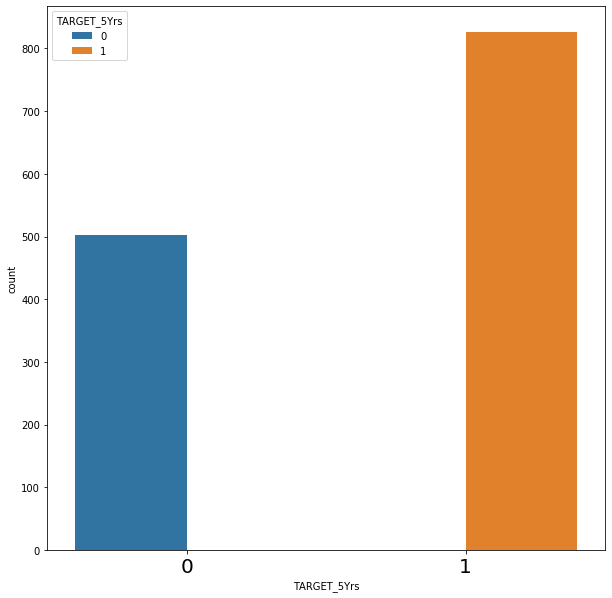

In [9]:
#Checking whether data are imbalanced or not
plt.figure(figsize=(10,10))
plt.rcParams["xtick.labelsize"] = 20
imbalance = sns.countplot(x='TARGET_5Yrs',hue="TARGET_5Yrs",data=ml_Model_1_Data)

From the above countplot, we could see that this dataset is imbalanced by having over <b>800</b> records for Yes i.e. 1 and <b>500</b> records for No i.e. 0

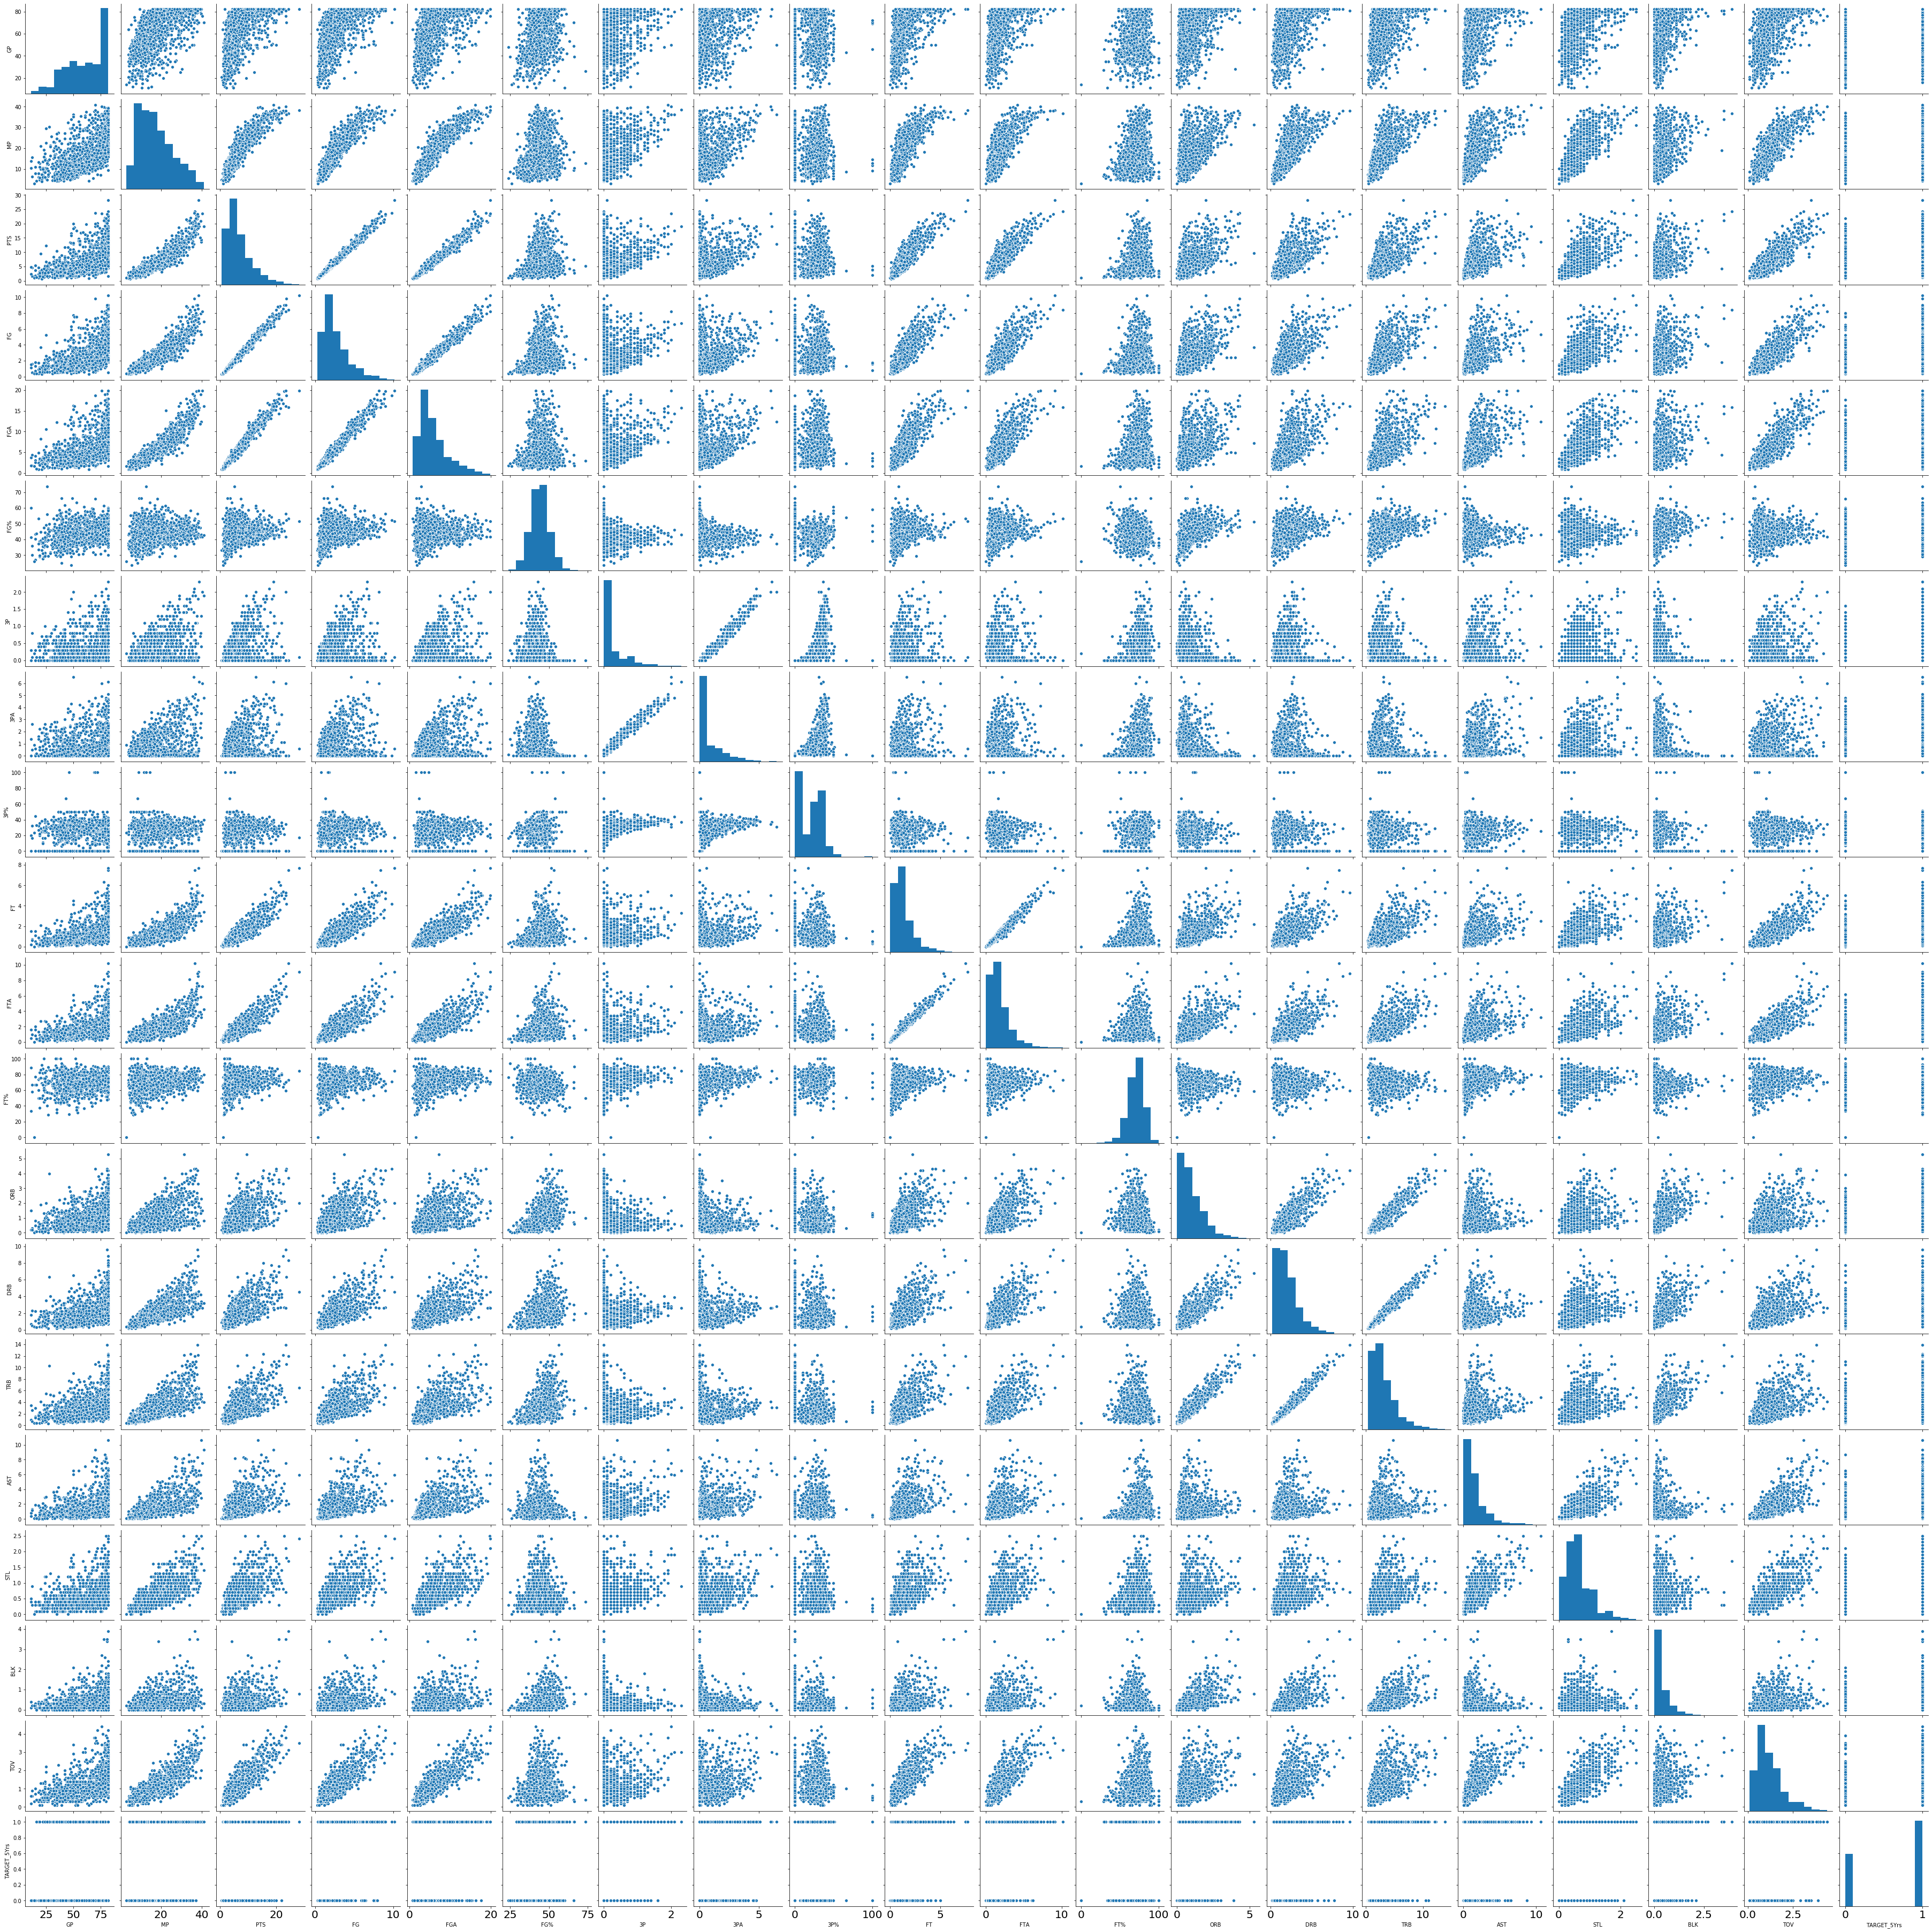

In [10]:
sns.pairplot(ml_Model_1_Data)

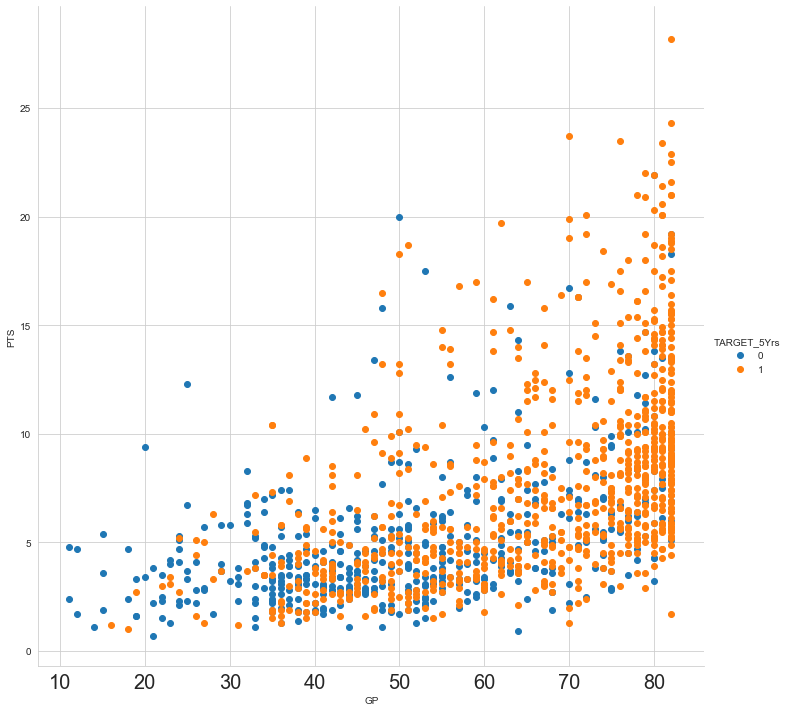

In [11]:
#Checking for linear separability
sns.set_style("whitegrid")
sns.FacetGrid(ml_Model_1_Data, hue="TARGET_5Yrs", height=10) \
   .map(plt.scatter, "GP", "PTS") \
   .add_legend()
plt.show()

<p>
    From the above plot, we can see two things; Firstly, the data is not linearly separable, hence we need to apply non-linear classification algorithms such as <b> SVM Kernel, k-nearest-neighbors (kNN), etc.</b>. Secondly, The players who stay with the league for more than 5 years have played more games and scored more points when compared with players who had stayed with the league for less than 5 years.
</p>

In [12]:
ml_Model_1_Data_With_All_Features = ml_Model_1_Data
ml_Model_1_Data_With_Selected_Features = ml_Model_1_Data

ml_Model_1_Data_With_Selected_Features = ml_Model_1_Data_With_Selected_Features.drop(['3P','3PA','3P%'],axis=1)

#Segregating dependent variable and independent variables
x1 = ml_Model_1_Data_With_All_Features.iloc[:,1:-1] #Independent variables.
y1 = ml_Model_1_Data_With_All_Features.iloc[:,-1] #Dependent or target variable.

x2 = ml_Model_1_Data_With_All_Features.iloc[:,1:-1] #Independent variables.
y2 = ml_Model_1_Data_With_All_Features.iloc[:,-1] #Dependent or target variable.

x3 = ml_Model_1_Data_With_Selected_Features.iloc[:,1:-1] #Independent variables.
y3 = ml_Model_1_Data_With_Selected_Features.iloc[:,-1] #Dependent or target variable.

In [13]:
#Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

test = SelectKBest(score_func=chi2, k=10)
fit = test.fit(x2, y2)

# Summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)

features = fit.transform(x2)
# Summarize selected features
print(features[0:10,:])

#GP, MP, PTS, FG, FGA, FT, FTA, ORB, DRB, TRB

[1.063e+03 5.212e+02 3.674e+02 1.436e+02 2.462e+02 6.256e+01 9.652e-01
 4.990e-01 2.054e-01 8.715e+01 1.121e+02 1.898e+01 6.946e+01 9.952e+01
 1.684e+02 5.591e+01 1.891e+01 2.987e+01 4.273e+01]
[[36.  27.4  7.4  2.6  7.6  1.6  2.3  0.7  3.4  4.1]
 [35.  26.9  7.2  2.   6.7  2.6  3.4  0.5  2.   2.4]
 [74.  15.3  5.2  2.   4.7  0.9  1.3  0.5  1.7  2.2]
 [58.  11.6  5.7  2.3  5.5  0.9  1.3  1.   0.9  1.9]
 [48.  11.5  4.5  1.6  3.   1.3  1.9  1.   1.5  2.5]
 [75.  11.4  3.7  1.5  3.5  0.4  0.5  0.2  0.7  0.8]
 [62.  10.9  6.6  2.5  5.8  1.5  1.8  0.5  1.4  2. ]
 [48.  10.3  5.7  2.3  5.4  0.7  0.8  0.8  0.9  1.7]
 [65.   9.9  2.4  1.   2.4  0.4  0.5  0.2  0.6  0.8]
 [42.   8.5  3.7  1.4  3.5  1.   1.4  0.4  0.7  1.1]]


In [14]:
x2 = x2.iloc[:,[0,1,2,3,4,9,10,12,13,14]]

In [15]:
#Splitting the data into train and test
X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(x1, y1, test_size=0.2, random_state=0)
X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(x2, y2, test_size=0.2, random_state=0)
X_train_3, X_test_3, Y_train_3, Y_test_3 = train_test_split(x3, y3, test_size=0.2, random_state=0)

In [16]:
#Scaling
sc_X_1 = StandardScaler()
X_train_1 = sc_X_1.fit_transform(X_train_1)
X_test_1 = sc_X_1.transform(X_test_1)

sc_X_3 = StandardScaler()
X_train_3 = sc_X_3.fit_transform(X_train_3)
X_test_3 = sc_X_3.transform(X_test_3)

sc_X_2 = StandardScaler()
X_train_2 = sc_X_2.fit_transform(X_train_2)
X_test_2 = sc_X_2.transform(X_test_2)

In [17]:
def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements 

In [18]:
#Model Fitting
def SVMModel(X_train,X_test,Y_train,Y_test):
    svclassifier_1 = SVC(kernel='rbf',probability=True,C=1).fit(X_train, Y_train)
    probas_1 = svclassifier_1.predict_proba(X_train)
    probas_2 = svclassifier_1.predict_proba(X_test)

    #Prediction and evaluation
    Y_svm_pred_1 = svclassifier_1.predict(X_train)
    Y_svm_pred_2 = svclassifier_1.predict(X_test)
    
    print("\n###############Training######################\n")
    print("Confusion Matrix : \n", confusion_matrix(Y_train, Y_svm_pred_1))
    print("Accuracy: ",round(accuracy(confusion_matrix(Y_train, Y_svm_pred_1)),2))

    print('Precision : {}'.format(round(precision_score(Y_train, Y_svm_pred_1),3)))
    print('Recall    : {}'.format(round(recall_score(Y_train, Y_svm_pred_1),3)))
    print('F-score   : {}'.format(round(f1_score(Y_train, Y_svm_pred_1),3)))
    
    fpr_1, tpr_1, thresholds_1 = roc_curve(Y_train, probas_1[:, 1])
    roc_auc_1 = round(auc(fpr_1, tpr_1),2)
    print("\nArea under the ROC curve for train : %f" % roc_auc_1)

    print("\n###############Testing######################\n")
    print("Confusion Matrix : \n", confusion_matrix(Y_test, Y_svm_pred_2))
    print("Accuracy: ",round(accuracy(confusion_matrix(Y_test, Y_svm_pred_2)),2))

    print('Precision : {}'.format(round(precision_score(Y_test, Y_svm_pred_2),3)))
    print('Recall    : {}'.format(round(recall_score(Y_test, Y_svm_pred_2),3)))
    print('F-score   : {}'.format(round(f1_score(Y_test, Y_svm_pred_2),3)))
    
    fpr_2, tpr_2, thresholds_2 = roc_curve(Y_test, probas_2[:, 1])
    roc_auc_2 = round(auc(fpr_2, tpr_2),2)
    print("\nArea under the ROC curve for test : %f" % roc_auc_2)
    
    plt.clf()
    plt.figure(figsize=(7,7))
    plt.plot(fpr_1, tpr_1, label='Train ROC curve (area = %0.2f)' % roc_auc_1)
    plt.plot(fpr_2, tpr_2, label='Test ROC curve (area = %0.2f)' % roc_auc_2)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    
    return svclassifier_1

#### With all features


###############Training######################

Confusion Matrix : 
 [[220 179]
 [ 93 571]]
Accuracy:  0.74
Precision : 0.761
Recall    : 0.86
F-score   : 0.808

Area under the ROC curve for train : 0.800000

###############Testing######################

Confusion Matrix : 
 [[ 54  50]
 [ 26 136]]
Accuracy:  0.71
Precision : 0.731
Recall    : 0.84
F-score   : 0.782

Area under the ROC curve for test : 0.760000


<Figure size 432x288 with 0 Axes>

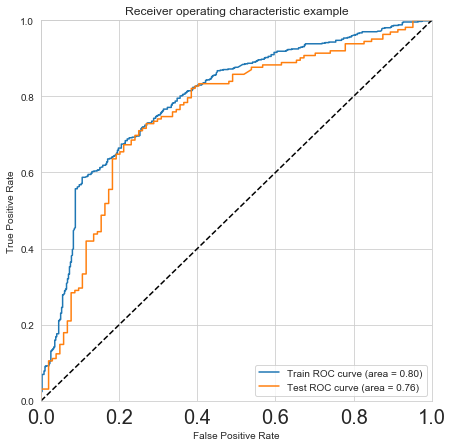

In [19]:
model_1_1 = SVMModel(X_train_1, X_test_1, Y_train_1, Y_test_1)

#### With selected features


###############Training######################

Confusion Matrix : 
 [[211 188]
 [102 562]]
Accuracy:  0.73
Precision : 0.749
Recall    : 0.846
F-score   : 0.795

Area under the ROC curve for train : 0.780000

###############Testing######################

Confusion Matrix : 
 [[ 54  50]
 [ 25 137]]
Accuracy:  0.72
Precision : 0.733
Recall    : 0.846
F-score   : 0.785

Area under the ROC curve for test : 0.750000


<Figure size 432x288 with 0 Axes>

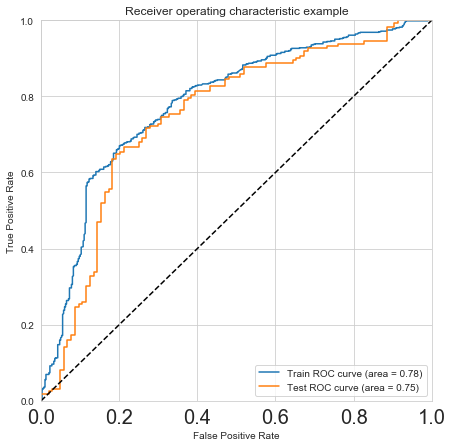

In [20]:
model_1_2 = SVMModel(X_train_3, X_test_3, Y_train_3, Y_test_3)

#### With features from feature selection


###############Training######################

Confusion Matrix : 
 [[210 189]
 [108 556]]
Accuracy:  0.72
Precision : 0.746
Recall    : 0.837
F-score   : 0.789

Area under the ROC curve for train : 0.760000

###############Testing######################

Confusion Matrix : 
 [[ 53  51]
 [ 25 137]]
Accuracy:  0.71
Precision : 0.729
Recall    : 0.846
F-score   : 0.783

Area under the ROC curve for test : 0.740000


<Figure size 432x288 with 0 Axes>

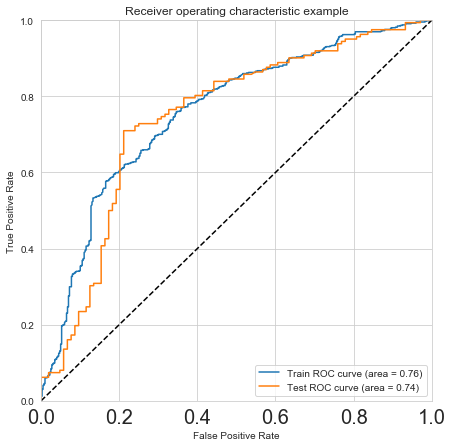

In [21]:
model_1_3 = SVMModel(X_train_2, X_test_2, Y_train_2, Y_test_2)

<img src="Docs/Depiction-of-a-ROC-Curve.jpg"></img>
<p>
    From the above AUC ROC curve plots (<b> with all features</b>, <b> With selected features based on domain knowledge </b> and <b> with features selected using feature selection techniques </b>), it can be seen that model performs better with all features than with selected features. Also comparing our AUC ROC curve plot(with all features) with the above theoritical AUC ROC curve, it can be seen that our model is a <b> skillful classifier </b>.
Since the dataset is imbalanced, we need to use different metrics to evaluate the model, hence I have chosen AUC ROC curve over accuracy. Based on the observation, I have found that AUC ROC value with all features is higher (<b>76% for test data and 80% for training data</b>) than the ROC value with selected features.
<br>
<br>
Moreover, we could see that the model's performance is average, this could be because of one of the following reasons:
    <br>
    <b>*</b> Imbalanced Dataset <br>
    <b>*</b> Small data size
</p>

#### Saving the model

In [22]:
filename = 'ML_Models/Career_Longevity.sav'
pickle.dump(model_1_2, open(filename, 'wb'))

## With Model 2 Data

In [63]:
seasons_Data = pd.read_csv("Data/1990_2017_Season_Data.csv")
seasons_Data.columns

Index(['Unnamed: 0', 'Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP',
       'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2',
       'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%',
       '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Salary'],
      dtype='object')

In [64]:
#seasons_Data[['Pos']] = seasons_Data.Pos.str.split("-").str[0]
#seasons_Data = seasons_Data[seasons_Data['Pos'].str.len()<=2]
seasons_Data['Pos_New'] = seasons_Data['Pos'].apply(lambda x: x.split('-')[0])
seasons_Data = seasons_Data[seasons_Data['G']>=30]
seasons_Data['Pos_New'].value_counts()

PF    2228
PG    2153
SG    2111
C     2072
SF    2035
Name: Pos_New, dtype: int64

In [55]:
seasons_Data.drop(columns=['blanl','blank2','Unnamed: 0','Year','Player','Tm','Salary','Pos'],inplace=True,axis=1)
ml_Model_2_Data = seasons_Data
ml_Model_2_Data

Age     G    GS      MP   PER    TS%   3PAr    FTr  ORB%  DRB%  ...  \
0      27.0  80.0  50.0  1691.0   8.3  0.536  0.014  0.421   9.3  17.8  ...   
1      27.0  79.0  74.0  2690.0  15.4  0.542  0.437  0.317   1.8   7.3  ...   
2      30.0  78.0  40.0  2005.0  15.8  0.544  0.104  0.283   6.7  10.6  ...   
3      30.0  75.0  68.0  2727.0  16.1  0.528  0.250  0.231   2.9  10.6  ...   
4      26.0  82.0  10.0  1893.0  14.1  0.510  0.062  0.169   8.5  12.8  ...   
...     ...   ...   ...     ...   ...    ...    ...    ...   ...   ...  ...   
15111  28.0  74.0  74.0  2237.0  14.9  0.562  0.172  0.125   6.7  15.8  ...   
15112  24.0  62.0  58.0  1725.0  16.7  0.604  0.002  0.442   8.6  17.3  ...   
15113  27.0  51.0   5.0   525.0  13.0  0.508  0.006  0.247   9.2  17.0  ...   
15115  22.0  44.0  18.0   843.0   6.9  0.503  0.448  0.181   1.9  14.2  ...   
15116  19.0  38.0  11.0   609.0  17.0  0.547  0.013  0.206   7.1  21.9  ...   

         ORB    DRB    TRB    AST    STL   BLK    TOV     PF     PTS  Pos_New  
0      154.0  277.0  431.0   67.0   36.0  25.0   70.0  248.0   362.0        C  
1       49.0  176.0  225.0  495.0  121.0   3.0  141.0  133.0  1221.0       PG  
2      117.0  188.0  305.0  145.0   34.0  19.0  121.0  201.0  1099.0       SF  
3       69.0  257.0  326.0  453.0  113.0  18.0  185.0  238.0  1342.0       PG  
4      151.0  223.0  374.0  142.0   60.0  39.0  101.0  219.0   860.0       PF  
...      ...    ...    ...    ...    ...   ...    ...    ...     ...      ...  
15111  131.0  318.0  449.0  122.0  114.0  30.0   96.0  135.0   814.0       PF  
15112  135.0  270.0  405.0   99.0   62.0  58.0   65.0  189.0   639.0       PF  
15113   43.0   81.0  124.0   42.0    7.0  21.0   20.0   61.0   178.0        C  
15115   15.0  110.0  125.0   36.0   15.0  16.0   40.0   78.0   240.0       SF  
15116   41.0  118.0  159.0   30.0   14.0  33.0   30.0   66.0   284.0        C  

[10599 rows x 47 columns]

In [56]:
#Checking for missing values
ml_Model_2_Data.isna().sum()

Age           0
G             0
GS            0
MP            0
PER           0
TS%           0
3PAr          0
FTr           0
ORB%          0
DRB%          0
TRB%          0
AST%          0
STL%          0
BLK%          0
TOV%          0
USG%          0
OWS           0
DWS           0
WS            0
WS/48         0
OBPM          0
DBPM          0
BPM           0
VORP          0
FG            0
FGA           0
FG%           0
3P            0
3PA           0
3P%        1088
2P            0
2PA           0
2P%           0
eFG%          0
FT            0
FTA           0
FT%           3
ORB           0
DRB           0
TRB           0
AST           0
STL           0
BLK           0
TOV           0
PF            0
PTS           0
Pos_New       0
dtype: int64

In [57]:
#Imputing Missing values
ml_Model_2_Data = ml_Model_2_Data.fillna(ml_Model_2_Data.median())
ml_Model_2_Data.isna().sum()

Age        0
G          0
GS         0
MP         0
PER        0
TS%        0
3PAr       0
FTr        0
ORB%       0
DRB%       0
TRB%       0
AST%       0
STL%       0
BLK%       0
TOV%       0
USG%       0
OWS        0
DWS        0
WS         0
WS/48      0
OBPM       0
DBPM       0
BPM        0
VORP       0
FG         0
FGA        0
FG%        0
3P         0
3PA        0
3P%        0
2P         0
2PA        0
2P%        0
eFG%       0
FT         0
FTA        0
FT%        0
ORB        0
DRB        0
TRB        0
AST        0
STL        0
BLK        0
TOV        0
PF         0
PTS        0
Pos_New    0
dtype: int64

In [58]:
ml_Model_2_Data.columns

Index(['Age', 'G', 'GS', 'MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%',
       'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS',
       'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA',
       '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB',
       'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Pos_New'],
      dtype='object')

In [59]:
ml_Model_2_Data['Pos_New'].value_counts()

PF    2228
PG    2153
SG    2111
C     2072
SF    2035
Name: Pos_New, dtype: int64

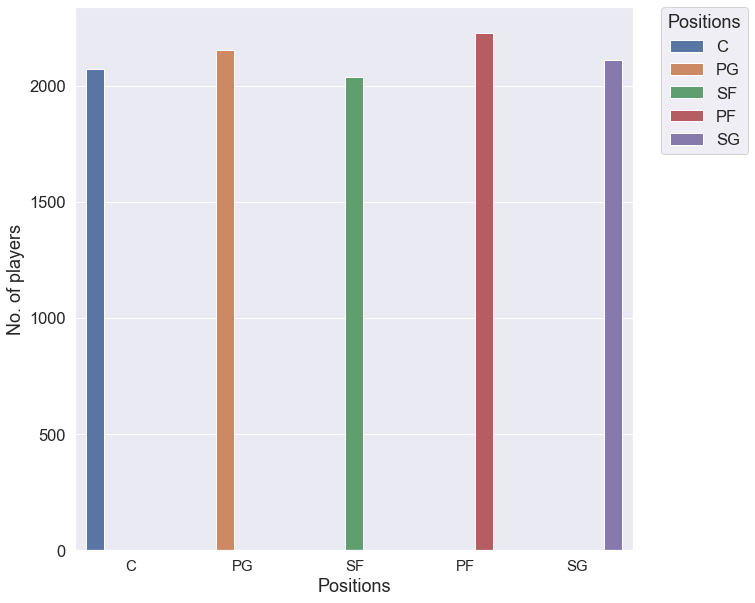

In [60]:
# Count of target labels and to check for imbalance dataset
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
plt.rcParams["xtick.labelsize"] = 15
imbalance = sns.countplot(x='Pos_New',hue="Pos_New",data=ml_Model_2_Data)
imbalance.set(xlabel='Positions', ylabel='No. of players')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,title="Positions")

###### From the above countplot, we could see that this dataset is not imbalanced which could make our model better in predicting positions of players

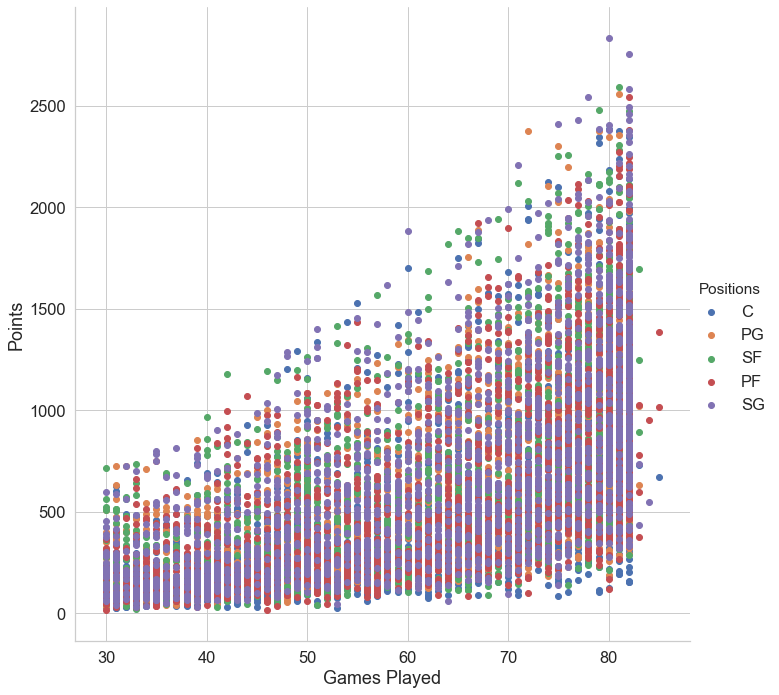

In [61]:
#Checking for linear separability
sns.set(font_scale=1.5)
sns.set_style("whitegrid")
sns.FacetGrid(ml_Model_2_Data, hue="Pos_New", height=10) \
   .map(plt.scatter, "G", "PTS") \
   .add_legend() \
   .set_axis_labels(x_var='Games Played', y_var='Points') \
   ._legend.set_title("Positions")
   #.axes[0,0].set_ylabel('axes label 1')
plt.show()

From the above plot, we can see two things; Firstly, the data is not linearly separable, hence we need to apply non-linear classification algorithms such as SVM Kernel, k-nearest-neighbors (kNN), etc.. Secondly, The players who have positions Small Forward (SF) are more in number and have scored more scores in the number of games they have played.

In [32]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from numpy import set_printoptions

dataset = ml_Model_2_Data.values
x = dataset[:,0:46]
y = dataset[:,-1]
test = SelectKBest(score_func=f_classif, k=10)
fit = test.fit(x, y)
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(x)
# summarize selected features
print(features[0:10,:])
cols = test.get_support(indices=True)
print(cols)

[4.881e+00 2.147e+00 4.755e+00 3.098e+01 2.282e+01 3.023e+01 1.212e+03
 3.725e+02 4.297e+03 4.344e+03 6.439e+03 4.162e+03 6.557e+02 2.535e+03
 4.513e+02 1.151e+02 1.117e+01 8.793e+01 4.568e+00 6.348e+01 3.203e+02
 8.535e+02 9.432e+00 6.555e+00 3.404e+01 8.208e+01 6.815e+02 7.132e+02
 7.996e+02 3.543e+02 2.002e+01 1.317e+01 2.594e+02 6.369e+01 1.356e+01
 7.253e+00 5.478e+02 1.117e+03 4.587e+02 6.827e+02 1.123e+03 2.754e+02
 9.923e+02 9.033e+01 1.850e+02 5.276e+01]
[[0.014 9.3 17.8 13.4 5.0 0.8 0.2 154.0 67.0 25.0]
 [0.4370000000000001 1.8 7.3 4.4 23.3 0.1 -0.9 49.0 495.0 3.0]
 [0.104 6.7 10.6 8.7 11.6 0.6 -0.5 117.0 145.0 19.0]
 [0.25 2.9 10.6 6.8 25.5 0.4 -0.6 69.0 453.0 18.0]
 [0.062 8.5 12.8 10.7 10.5 1.2 -0.6 151.0 142.0 39.0]
 [0.159 0.8 8.5 4.7 21.2 0.6 -2.0 2.0 39.0 3.0]
 [0.029 7.5 13.4 10.5 4.4 1.5 -1.3 49.0 23.0 19.0]
 [0.0 9.8 23.6 16.6 2.7 2.6 -0.8 112.0 24.0 54.0]
 [0.023 6.1 12.7 9.3 10.5 1.0 -1.0 107.0 124.0 34.0]
 [0.474 5.9 18.8 11.9 13.4 0.9 -0.1 33.0 55.0 9.0]]
[ 6  8

In [33]:
ml_Model_2_Data.columns

Index(['Age', 'G', 'GS', 'MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%',
       'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS',
       'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA',
       '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB',
       'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Pos_New'],
      dtype='object')

In [34]:
selected_Features = ['Pos_New','3PAr','ORB%','DRB%','TRB%','AST%','BLK%','DBPM','ORB','AST','BLK']
feature_selected_data = ml_Model_2_Data[selected_Features]
feature_selected_data.head()

Pos_New   3PAr  ORB%  DRB%  TRB%  AST%  BLK%  DBPM    ORB    AST   BLK
0       C  0.014   9.3  17.8  13.4   5.0   0.8   0.2  154.0   67.0  25.0
1      PG  0.437   1.8   7.3   4.4  23.3   0.1  -0.9   49.0  495.0   3.0
2      SF  0.104   6.7  10.6   8.7  11.6   0.6  -0.5  117.0  145.0  19.0
3      PG  0.250   2.9  10.6   6.8  25.5   0.4  -0.6   69.0  453.0  18.0
4      PF  0.062   8.5  12.8  10.7  10.5   1.2  -0.6  151.0  142.0  39.0

In [35]:
#with all features
b4_Ft_Selection = ml_Model_2_Data
X_train_all, X_test_all, Y_train_all, Y_test_all = train_test_split(b4_Ft_Selection.drop(labels = ['Pos_New'],axis=1), b4_Ft_Selection['Pos_New'], 
                                                    test_size=0.2, random_state=0)

#Scaling
sc_X = StandardScaler()
X_train_all = sc_X.fit_transform(X_train_all)
X_test_all = sc_X.transform(X_test_all)

In [36]:
#with selected features
selected_data = feature_selected_data
X_train_selected, X_test_selected, Y_train_selected, Y_test_selected = train_test_split(selected_data.drop(labels = ['Pos_New'],axis=1), selected_data['Pos_New'], 
                                                    test_size=0.25, random_state=123)

#Scaling
sc_X = StandardScaler()
X_train_selected = sc_X.fit_transform(X_train_selected)
X_test_selected = sc_X.transform(X_test_selected)

In [37]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 10, 100,1000,10000],  
              'gamma': [1, 0.1, 0.01, 0.001], 
              'kernel': ['rbf']}  
clf = GridSearchCV(SVC(), param_grid, cv=3,verbose = 3)
clf.fit(X_train_all,Y_train_all)
# print best parameter after tuning 
print(clf.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(clf.best_estimator_) 

grid_prediction_train = clf.predict(X_train_all) 
  
# print classification report 
print(metrics.classification_report(Y_train_all, grid_prediction_train)) 

grid_prediction_test = clf.predict(X_test_all) 
  
# print classification report 
print(metrics.classification_report(Y_test_all, grid_prediction_test)) 

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] C=1, gamma=1, kernel=rbf ........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............ C=1, gamma=1, kernel=rbf, score=0.237, total=   4.3s
[CV] C=1, gamma=1, kernel=rbf ........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.3s remaining:    0.0s


[CV] ............ C=1, gamma=1, kernel=rbf, score=0.236, total=   4.2s
[CV] C=1, gamma=1, kernel=rbf ........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    8.5s remaining:    0.0s


[CV] ............ C=1, gamma=1, kernel=rbf, score=0.239, total=   5.2s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.683, total=   2.8s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.694, total=   2.6s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.679, total=   2.9s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.701, total=   1.6s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.694, total=   1.6s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.680, total=   1.6s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  4.4min finished


{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
              precision    recall  f1-score   support

           C       0.81      0.81      0.81      1667
          PF       0.71      0.73      0.72      1810
          PG       0.88      0.91      0.90      1718
          SF       0.69      0.68      0.69      1619
          SG       0.74      0.72      0.73      1665

    accuracy                           0.77      8479
   macro avg       0.77      0.77      0.77      8479
weighted avg       0.77      0.77      0.77      8479

              precision    recall  f1-score   support

           C       0.76      0.75      0.76       405
          PF       0.60      0.66      0.63       418
          PG       0.85      0.89      0.87       435
      

In [38]:
#Model Fitting
from sklearn.neighbors import KNeighborsClassifier
def SVMModel2(X_train,X_test,Y_train,Y_test,c,g):
    svclassifier_1 = SVC(kernel='rbf',probability=False,C=c,gamma=g).fit(X_train, Y_train)
    
    #Prediction and evaluation
    Y_svm_pred_1 = svclassifier_1.predict(X_train)
    Y_svm_pred_2 = svclassifier_1.predict(X_test)
    
    print("\n###############Training######################\n")
    print("Confusion Matrix : \n", confusion_matrix(Y_train, Y_svm_pred_1))
    print(metrics.classification_report(Y_train, Y_svm_pred_1,digits=2))

    print("\n###############Testing######################\n")
    print("Confusion Matrix : \n", confusion_matrix(Y_test, Y_svm_pred_2))    
    print(metrics.classification_report(Y_test, Y_svm_pred_2,digits=2))

    return svclassifier_1

In [39]:
model_2_1 = SVMModel2(X_train_selected, X_test_selected, Y_train_selected, Y_test_selected,10000,0.01)


###############Training######################

Confusion Matrix : 
 [[1214  318    0   32    3]
 [ 422  987    3  228   32]
 [   0    0 1405   11  174]
 [  36  198   13  926  345]
 [   1   17  222  287 1075]]
              precision    recall  f1-score   support

           C       0.73      0.77      0.75      1567
          PF       0.65      0.59      0.62      1672
          PG       0.86      0.88      0.87      1590
          SF       0.62      0.61      0.62      1518
          SG       0.66      0.67      0.67      1602

    accuracy                           0.71      7949
   macro avg       0.70      0.71      0.70      7949
weighted avg       0.70      0.71      0.70      7949


###############Testing######################

Confusion Matrix : 
 [[375 116   0  12   2]
 [148 310   2  90   6]
 [  0   3 491   5  64]
 [ 16  75   6 293 127]
 [  1   8  68  99 333]]
              precision    recall  f1-score   support

           C       0.69      0.74      0.72       505
        

In [40]:
model_2_2 = SVMModel2(X_train_all, X_test_all, Y_train_all, Y_test_all,10,0.01)


###############Training######################

Confusion Matrix : 
 [[1342  301    0   22    2]
 [ 292 1318    2  184   14]
 [   0    1 1568   11  138]
 [  15  220   15 1098  271]
 [   0   17  189  265 1194]]
              precision    recall  f1-score   support

           C       0.81      0.81      0.81      1667
          PF       0.71      0.73      0.72      1810
          PG       0.88      0.91      0.90      1718
          SF       0.69      0.68      0.69      1619
          SG       0.74      0.72      0.73      1665

    accuracy                           0.77      8479
   macro avg       0.77      0.77      0.77      8479
weighted avg       0.77      0.77      0.77      8479


###############Testing######################

Confusion Matrix : 
 [[305  96   0   4   0]
 [ 88 274   0  52   4]
 [  0   0 389   2  44]
 [  5  76   3 252  80]
 [  1   8  68  74 295]]
              precision    recall  f1-score   support

           C       0.76      0.75      0.76       405
        

#### Saving the model

In [41]:
filename = 'ML_Models/NBA_Player_Position.sav'
pickle.dump(model_2_2, open(filename, 'wb'))

## With Model 3 Data

In [27]:
#Feature selection
def correlationPlot(dataSet):
    correlation_Matrix_3 = dataSet.corr()
    features_3 = correlation_Matrix_3.index
    plt.figure(figsize=(50,20))
    ml_3_data_heatMap = sns.heatmap(dataSet[features_3].corr(),annot=True,cmap="RdYlGn")

In [103]:
seasons_Data = pd.read_csv("Data/1990_2017_Season_Data.csv")
seasons_Data.columns

Index(['Unnamed: 0', 'Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP',
       'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2',
       'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%',
       '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Salary'],
      dtype='object')

In [142]:
seasons_Data = seasons_Data[seasons_Data['G']>=30]
seasons_Data = seasons_Data.drop_duplicates(keep=False)

In [143]:
ml_Model_3_Data = seasons_Data.drop(columns=['blanl','blank2','Unnamed: 0','Player','Tm','Pos','Year'],axis=1)
ml_Model_3_Data

Age     G    GS      MP   PER    TS%   3PAr    FTr  ORB%  DRB%  ...  \
0      27.0  80.0  50.0  1691.0   8.3  0.536  0.014  0.421   9.3  17.8  ...   
1      27.0  79.0  74.0  2690.0  15.4  0.542  0.437  0.317   1.8   7.3  ...   
2      30.0  78.0  40.0  2005.0  15.8  0.544  0.104  0.283   6.7  10.6  ...   
3      30.0  75.0  68.0  2727.0  16.1  0.528  0.250  0.231   2.9  10.6  ...   
4      26.0  82.0  10.0  1893.0  14.1  0.510  0.062  0.169   8.5  12.8  ...   
...     ...   ...   ...     ...   ...    ...    ...    ...   ...   ...  ...   
15111  28.0  74.0  74.0  2237.0  14.9  0.562  0.172  0.125   6.7  15.8  ...   
15112  24.0  62.0  58.0  1725.0  16.7  0.604  0.002  0.442   8.6  17.3  ...   
15113  27.0  51.0   5.0   525.0  13.0  0.508  0.006  0.247   9.2  17.0  ...   
15115  22.0  44.0  18.0   843.0   6.9  0.503  0.448  0.181   1.9  14.2  ...   
15116  19.0  38.0  11.0   609.0  17.0  0.547  0.013  0.206   7.1  21.9  ...   

         ORB    DRB    TRB    AST    STL   BLK    TOV     PF     PTS    Salary  
0      154.0  277.0  431.0   67.0   36.0  25.0   70.0  248.0   362.0    437000  
1       49.0  176.0  225.0  495.0  121.0   3.0  141.0  133.0  1221.0    825000  
2      117.0  188.0  305.0  145.0   34.0  19.0  121.0  201.0  1099.0   1115000  
3       69.0  257.0  326.0  453.0  113.0  18.0  185.0  238.0  1342.0    725000  
4      151.0  223.0  374.0  142.0   60.0  39.0  101.0  219.0   860.0    500000  
...      ...    ...    ...    ...    ...   ...    ...    ...     ...       ...  
15111  131.0  318.0  449.0  122.0  114.0  30.0   96.0  135.0   814.0  14153652  
15112  135.0  270.0  405.0   99.0   62.0  58.0   65.0  189.0   639.0   5318313  
15113   43.0   81.0  124.0   42.0    7.0  21.0   20.0   61.0   178.0   8000000  
15115   15.0  110.0  125.0   36.0   15.0  16.0   40.0   78.0   240.0    750000  
15116   41.0  118.0  159.0   30.0   14.0  33.0   30.0   66.0   284.0   1034956  

[10599 rows x 47 columns]

In [144]:
#Checking for missing values
ml_Model_3_Data.isna().sum()

Age          0
G            0
GS           0
MP           0
PER          0
TS%          0
3PAr         0
FTr          0
ORB%         0
DRB%         0
TRB%         0
AST%         0
STL%         0
BLK%         0
TOV%         0
USG%         0
OWS          0
DWS          0
WS           0
WS/48        0
OBPM         0
DBPM         0
BPM          0
VORP         0
FG           0
FGA          0
FG%          0
3P           0
3PA          0
3P%       1088
2P           0
2PA          0
2P%          0
eFG%         0
FT           0
FTA          0
FT%          3
ORB          0
DRB          0
TRB          0
AST          0
STL          0
BLK          0
TOV          0
PF           0
PTS          0
Salary       0
dtype: int64

In [145]:
ml_Model_3_Data = ml_Model_3_Data.fillna(ml_Model_3_Data.median())
ml_Model_3_Data.isna().sum()

Age       0
G         0
GS        0
MP        0
PER       0
TS%       0
3PAr      0
FTr       0
ORB%      0
DRB%      0
TRB%      0
AST%      0
STL%      0
BLK%      0
TOV%      0
USG%      0
OWS       0
DWS       0
WS        0
WS/48     0
OBPM      0
DBPM      0
BPM       0
VORP      0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
Salary    0
dtype: int64

In [146]:
#Normalization
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, normalize

# Get column names first
names = ml_Model_3_Data.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(ml_Model_3_Data)
scaled_df = pd.DataFrame(scaled_df, columns=names)
  
# Normalizing the Data 
normalized_df = normalize(scaled_df) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df,columns=names) 

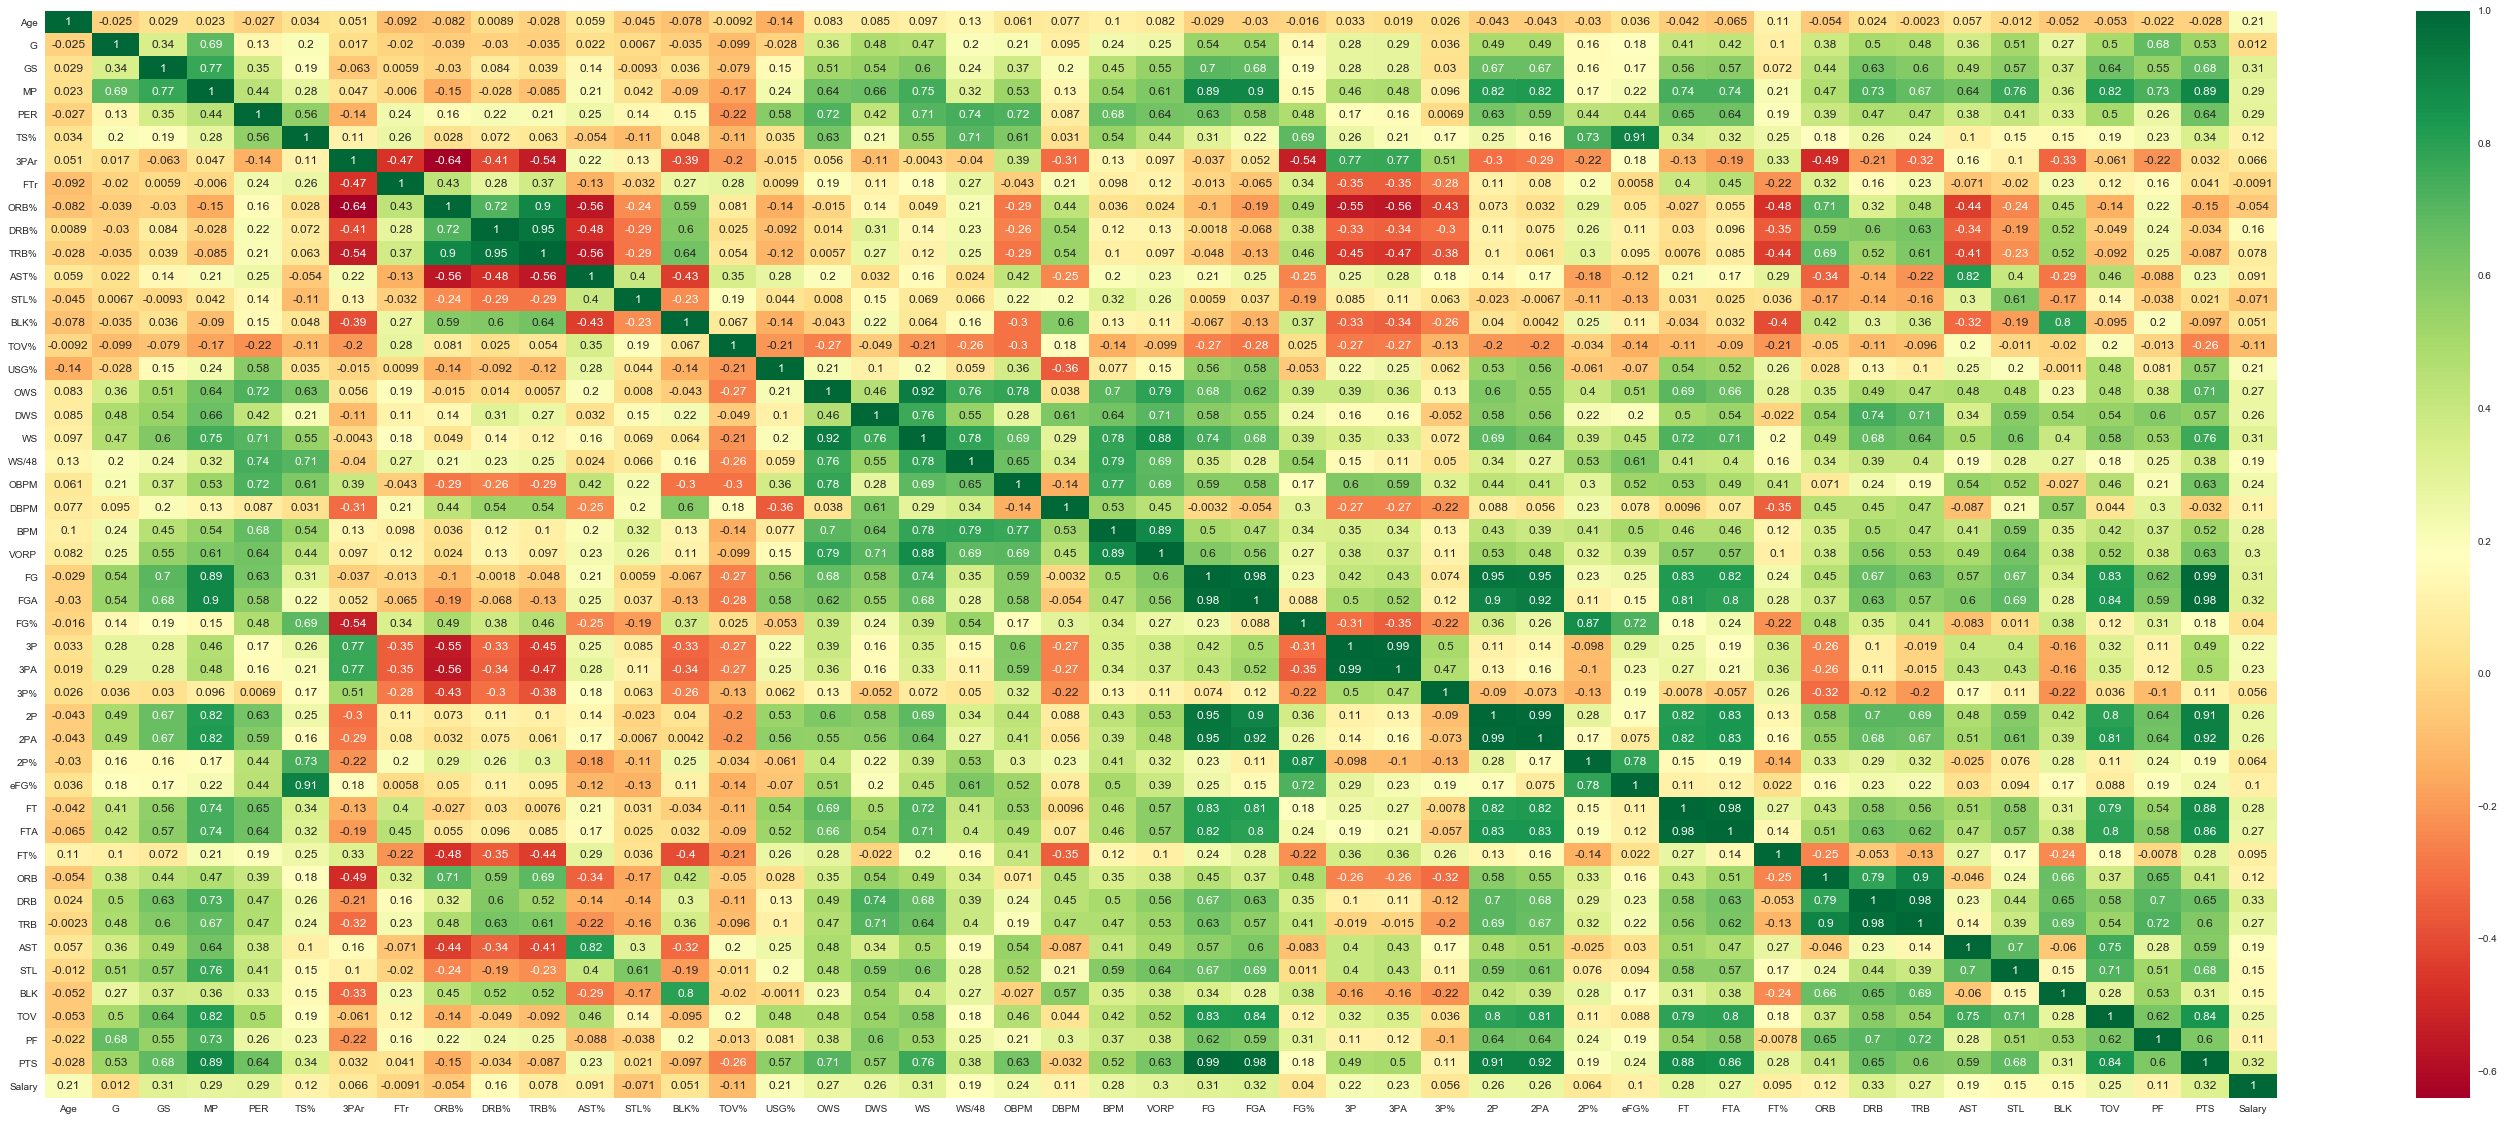

In [147]:
correlationPlot(normalized_df)

In [148]:
#Feature Selection using LassoCV

from sklearn.linear_model import LassoCV

#Feature Selection
X = normalized_df.drop("Salary",1)   #Feature Matrix
y = normalized_df["Salary"]          #Target Variable

reg = LassoCV()
reg.fit(X, y)

/Users/lawrence/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03126449206780535, tolerance: 0.020132752780387262
  tol, rng, random, positive)
/Users/lawrence/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.031954899916286195, tolerance: 0.020132752780387262
  tol, rng, random, positive)
/Users/lawrence/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03790957520448046, tolerance: 0.020132752780387262
  tol, rng, random, positive)
/Users/lawrence/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordin

LassoCV()

In [149]:
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 0.000124
Best score using built-in LassoCV: 0.285740


In [150]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  
      str(sum(coef == 0)) + " variables")

Lasso picked 24 variables and eliminated the other 22 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

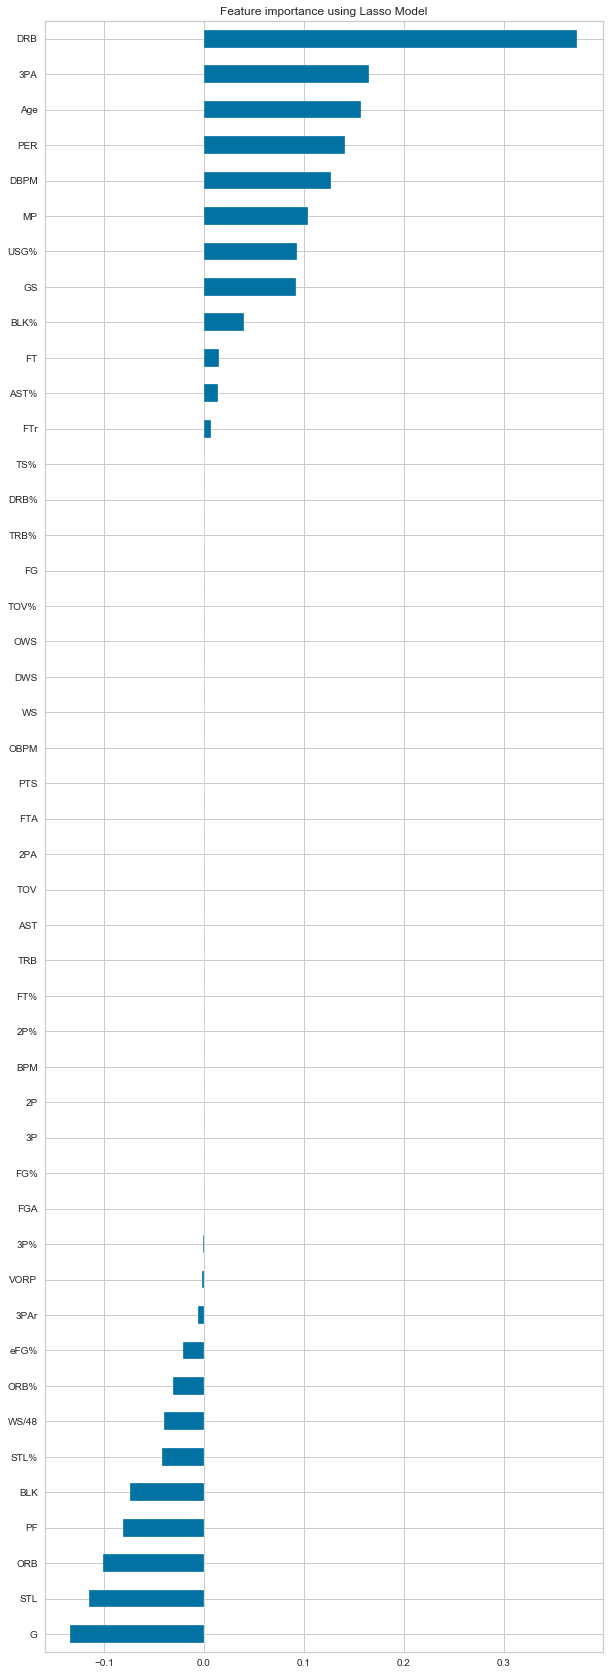

In [151]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 30.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [152]:
selected_feat = (coef != 0).to_frame().reset_index()

In [153]:
selected_feat.rename(columns={"index":"Features",0:"Selected"},inplace=True)

In [154]:
selected_feat

Features  Selected
0       Age      True
1         G      True
2        GS      True
3        MP      True
4       PER      True
5       TS%     False
6      3PAr      True
7       FTr      True
8      ORB%      True
9      DRB%     False
10     TRB%     False
11     AST%      True
12     STL%      True
13     BLK%      True
14     TOV%     False
15     USG%      True
16      OWS     False
17      DWS     False
18       WS     False
19    WS/48      True
20     OBPM     False
21     DBPM      True
22      BPM     False
23     VORP      True
24       FG     False
25      FGA     False
26      FG%     False
27       3P     False
28      3PA      True
29      3P%      True
30       2P     False
31      2PA     False
32      2P%     False
33     eFG%      True
34       FT      True
35      FTA     False
36      FT%     False
37      ORB      True
38      DRB      True
39      TRB     False
40      AST     False
41      STL      True
42      BLK      True
43      TOV     False
44       PF      True
45      PTS     False

In [155]:
selected_feat = selected_feat[selected_feat["Selected"] == True]

In [156]:
selected_feat = list(selected_feat.iloc[:,0])

In [157]:
ml_Model_2_Data_selected_feat = ml_Model_2_Data[selected_feat]
ml_Model_2_Data_selected_feat

Age     G    GS      MP   PER   3PAr    FTr  ORB%  AST%  STL%  ...  \
0      27.0  80.0  50.0  1691.0   8.3  0.014  0.421   9.3   5.0   1.0  ...   
1      27.0  79.0  74.0  2690.0  15.4  0.437  0.317   1.8  23.3   2.0  ...   
2      30.0  78.0  40.0  2005.0  15.8  0.104  0.283   6.7  11.6   0.9  ...   
3      30.0  75.0  68.0  2727.0  16.1  0.250  0.231   2.9  25.5   2.1  ...   
4      26.0  82.0  10.0  1893.0  14.1  0.062  0.169   8.5  10.5   1.5  ...   
...     ...   ...   ...     ...   ...    ...    ...   ...   ...   ...  ...   
15111  28.0  74.0  74.0  2237.0  14.9  0.172  0.125   6.7   8.4   2.6  ...   
15112  24.0  62.0  58.0  1725.0  16.7  0.002  0.442   8.6   9.1   1.8  ...   
15113  27.0  51.0   5.0   525.0  13.0  0.006  0.247   9.2  12.2   0.7  ...   
15115  22.0  44.0  18.0   843.0   6.9  0.448  0.181   1.9   6.1   0.9  ...   
15116  19.0  38.0  11.0   609.0  17.0  0.013  0.206   7.1   8.1   1.1  ...   

       VORP    3PA    3P%   eFG%     FT    ORB    DRB    STL   BLK     PF  
0       0.0    4.0  0.750  0.489   83.0  154.0  277.0   36.0  25.0  248.0  
1       2.5  432.0  0.366  0.482  267.0   49.0  176.0  121.0   3.0  133.0  
2       1.3   93.0  0.333  0.505  192.0  117.0  188.0   34.0  19.0  201.0  
3       2.5  289.0  0.374  0.485  222.0   69.0  257.0  113.0  18.0  238.0  
4       0.5   49.0  0.204  0.479  108.0  151.0  223.0   60.0  39.0  219.0  
...     ...    ...    ...    ...    ...    ...    ...    ...   ...    ...  
15111   2.0  118.0  0.381  0.560   45.0  131.0  318.0  114.0  30.0  135.0  
15112   1.8    1.0  0.000  0.571  133.0  135.0  270.0   62.0  58.0  189.0  
15113  -0.1    1.0  0.000  0.494   22.0   43.0   81.0    7.0  21.0   61.0  
15115  -0.4   99.0  0.333  0.473   31.0   15.0  110.0   15.0  16.0   78.0  
15116  -0.1    3.0  0.000  0.529   32.0   41.0  118.0   14.0  33.0   66.0  

[10599 rows x 24 columns]

In [158]:
from sklearn.cluster import KMeans

wcss=[]
for i in range (1,15):
    kmeans=KMeans(i)
    kmeans.fit(ml_Model_2_Data_selected_feat)
    wcss.append(kmeans.inertia_)
wcss

[7457236726.323519,
 2269011315.1852717,
 1207046049.2210398,
 840401320.489701,
 652712195.9232503,
 553652235.6584519,
 492754375.36649114,
 449957859.6653232,
 411175332.2447801,
 377243012.97072744,
 351769853.22047406,
 329919518.3587842,
 313567624.811426,
 296558066.4382373]

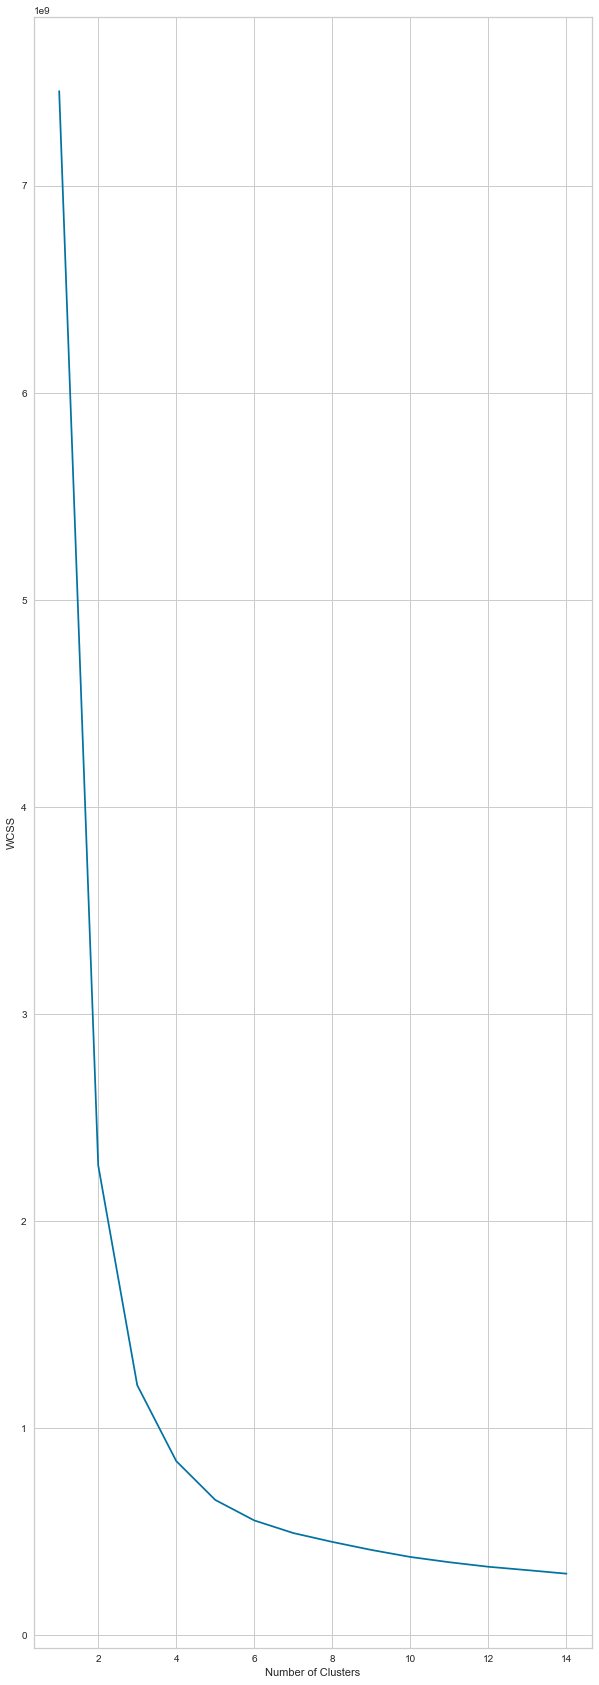

In [159]:
#Elbow Plot
plt.plot(range(1,15),wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

/Users/lawrence/opt/anaconda3/lib/python3.7/site-packages/yellowbrick/utils/kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/Users/lawrence/opt/anaconda3/lib/python3.7/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/Users/lawrence/opt/anaconda3/lib/python3.7/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


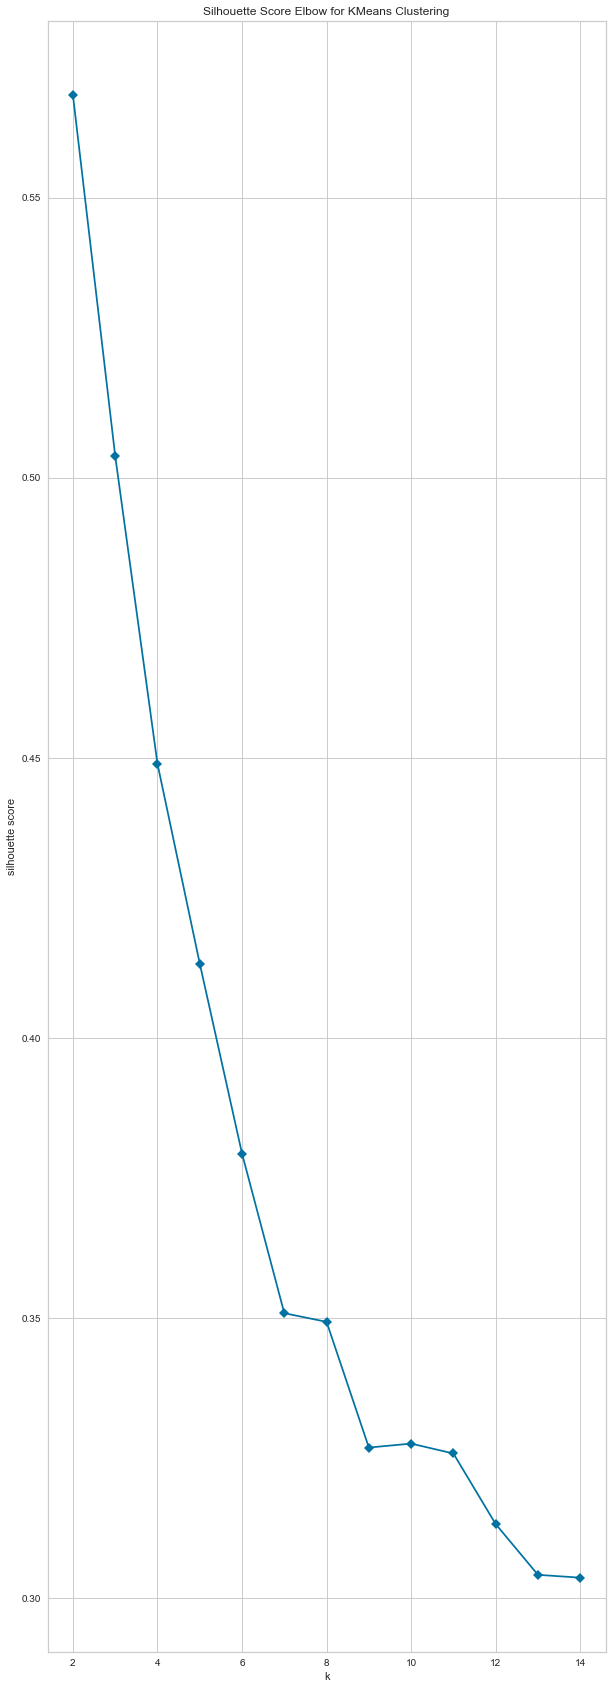

In [160]:
#Another Technique to define n_cluster

# Import the KElbowVisualizer method 
from yellowbrick.cluster import KElbowVisualizer

# Instantiate a scikit-learn K-Means model
model = KMeans(random_state=0)

# Instantiate the KElbowVisualizer with the number of clusters and the metric 
visualizer = KElbowVisualizer(model, k=(2,15), metric='silhouette', timings=False)

# Fit the data and visualize
visualizer.fit(ml_Model_2_Data_selected_feat)    
visualizer.poof()  

In [161]:
k_means_new=KMeans(2)
kmeans.fit(ml_Model_2_Data_selected_feat)
clustered_data=ml_Model_2_Data_selected_feat.copy()
clustered_data['cluster_pred']=k_means_new.fit_predict(ml_Model_2_Data_selected_feat)
clustered_data.head()

Age     G    GS      MP   PER   3PAr    FTr  ORB%  AST%  STL%  ...    3PA  \
0  27.0  80.0  50.0  1691.0   8.3  0.014  0.421   9.3   5.0   1.0  ...    4.0   
1  27.0  79.0  74.0  2690.0  15.4  0.437  0.317   1.8  23.3   2.0  ...  432.0   
2  30.0  78.0  40.0  2005.0  15.8  0.104  0.283   6.7  11.6   0.9  ...   93.0   
3  30.0  75.0  68.0  2727.0  16.1  0.250  0.231   2.9  25.5   2.1  ...  289.0   
4  26.0  82.0  10.0  1893.0  14.1  0.062  0.169   8.5  10.5   1.5  ...   49.0   

     3P%   eFG%     FT    ORB    DRB    STL   BLK     PF  cluster_pred  
0  0.750  0.489   83.0  154.0  277.0   36.0  25.0  248.0             0  
1  0.366  0.482  267.0   49.0  176.0  121.0   3.0  133.0             0  
2  0.333  0.505  192.0  117.0  188.0   34.0  19.0  201.0             0  
3  0.374  0.485  222.0   69.0  257.0  113.0  18.0  238.0             0  
4  0.204  0.479  108.0  151.0  223.0   60.0  39.0  219.0             0  

[5 rows x 25 columns]

In [162]:
clustered_data['cluster_pred'].value_counts()

1    5871
0    4728
Name: cluster_pred, dtype: int64

In [163]:
clustered_data.head()

Age     G    GS      MP   PER   3PAr    FTr  ORB%  AST%  STL%  ...    3PA  \
0  27.0  80.0  50.0  1691.0   8.3  0.014  0.421   9.3   5.0   1.0  ...    4.0   
1  27.0  79.0  74.0  2690.0  15.4  0.437  0.317   1.8  23.3   2.0  ...  432.0   
2  30.0  78.0  40.0  2005.0  15.8  0.104  0.283   6.7  11.6   0.9  ...   93.0   
3  30.0  75.0  68.0  2727.0  16.1  0.250  0.231   2.9  25.5   2.1  ...  289.0   
4  26.0  82.0  10.0  1893.0  14.1  0.062  0.169   8.5  10.5   1.5  ...   49.0   

     3P%   eFG%     FT    ORB    DRB    STL   BLK     PF  cluster_pred  
0  0.750  0.489   83.0  154.0  277.0   36.0  25.0  248.0             0  
1  0.366  0.482  267.0   49.0  176.0  121.0   3.0  133.0             0  
2  0.333  0.505  192.0  117.0  188.0   34.0  19.0  201.0             0  
3  0.374  0.485  222.0   69.0  257.0  113.0  18.0  238.0             0  
4  0.204  0.479  108.0  151.0  223.0   60.0  39.0  219.0             0  

[5 rows x 25 columns]

In [164]:
player_year_data = pd.concat([seasons_Data['Player'],seasons_Data['Year']],axis=1)

In [165]:
player_year_data.head()

Player    Year
0     Mark Acres  1990.0
1  Michael Adams  1990.0
2   Mark Aguirre  1990.0
3    Danny Ainge  1990.0
4    Mark Alarie  1990.0

In [166]:
clustered_data = pd.concat([player_year_data,clustered_data],axis=1)

In [167]:
clustered_data.head()

Player    Year   Age     G    GS      MP   PER   3PAr    FTr  ORB%  \
0     Mark Acres  1990.0  27.0  80.0  50.0  1691.0   8.3  0.014  0.421   9.3   
1  Michael Adams  1990.0  27.0  79.0  74.0  2690.0  15.4  0.437  0.317   1.8   
2   Mark Aguirre  1990.0  30.0  78.0  40.0  2005.0  15.8  0.104  0.283   6.7   
3    Danny Ainge  1990.0  30.0  75.0  68.0  2727.0  16.1  0.250  0.231   2.9   
4    Mark Alarie  1990.0  26.0  82.0  10.0  1893.0  14.1  0.062  0.169   8.5   

   ...    3PA    3P%   eFG%     FT    ORB    DRB    STL   BLK     PF  \
0  ...    4.0  0.750  0.489   83.0  154.0  277.0   36.0  25.0  248.0   
1  ...  432.0  0.366  0.482  267.0   49.0  176.0  121.0   3.0  133.0   
2  ...   93.0  0.333  0.505  192.0  117.0  188.0   34.0  19.0  201.0   
3  ...  289.0  0.374  0.485  222.0   69.0  257.0  113.0  18.0  238.0   
4  ...   49.0  0.204  0.479  108.0  151.0  223.0   60.0  39.0  219.0   

   cluster_pred  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 27 columns]

In [168]:
cluster_Zero_Data = clustered_data[clustered_data['cluster_pred']==0]
cluster_Zero_Data

Player    Year   Age     G    GS      MP   PER   3PAr    FTr  \
0           Mark Acres  1990.0  27.0  80.0  50.0  1691.0   8.3  0.014  0.421   
1        Michael Adams  1990.0  27.0  79.0  74.0  2690.0  15.4  0.437  0.317   
2         Mark Aguirre  1990.0  30.0  78.0  40.0  2005.0  15.8  0.104  0.283   
3          Danny Ainge  1990.0  30.0  75.0  68.0  2727.0  16.1  0.250  0.231   
4          Mark Alarie  1990.0  26.0  82.0  10.0  1893.0  14.1  0.062  0.169   
...                ...     ...   ...   ...   ...     ...   ...    ...    ...   
15087   Deron Williams  2017.0  32.0  64.0  44.0  1657.0  14.0  0.390  0.182   
15093     Lou Williams  2017.0  30.0  81.0   1.0  1994.0  21.4  0.447  0.458   
15096  Marvin Williams  2017.0  30.0  76.0  76.0  2295.0  13.7  0.503  0.213   
15111   Thaddeus Young  2017.0  28.0  74.0  74.0  2237.0  14.9  0.172  0.125   
15112      Cody Zeller  2017.0  24.0  62.0  58.0  1725.0  16.7  0.002  0.442   

       ORB%  ...    3PA    3P%   eFG%     FT    ORB    DRB    STL   BLK  \
0       9.3  ...    4.0  0.750  0.489   83.0  154.0  277.0   36.0  25.0   
1       1.8  ...  432.0  0.366  0.482  267.0   49.0  176.0  121.0   3.0   
2       6.7  ...   93.0  0.333  0.505  192.0  117.0  188.0   34.0  19.0   
3       2.9  ...  289.0  0.374  0.485  222.0   69.0  257.0  113.0  18.0   
4       8.5  ...   49.0  0.204  0.479  108.0  151.0  223.0   60.0  39.0   
...     ...  ...    ...    ...    ...    ...    ...    ...    ...   ...   
15087   0.9  ...  234.0  0.363  0.509   90.0   14.0  133.0   31.0   8.0   
15093   1.4  ...  446.0  0.365  0.511  402.0   26.0  176.0   80.0  19.0   
15096   4.2  ...  354.0  0.350  0.510  131.0   89.0  409.0   58.0  53.0   
15111   6.7  ...  118.0  0.381  0.560   45.0  131.0  318.0  114.0  30.0   
15112   8.6  ...    1.0  0.000  0.571  133.0  135.0  270.0   62.0  58.0   

          PF  cluster_pred  
0      248.0             0  
1      133.0             0  
2      201.0             0  
3      238.0             0  
4      219.0             0  
...      ...           ...  
15087  138.0             0  
15093   92.0             0  
15096  134.0             0  
15111  135.0             0  
15112  189.0             0  

[4728 rows x 27 columns]

In [169]:
cluster_Zero_Data[cluster_Zero_Data['Player'] == "LeBron James"]

Player    Year   Age     G    GS      MP   PER   3PAr    FTr  \
7185   LeBron James  2004.0  19.0  79.0  79.0  3122.0  18.3  0.145  0.308   
7782   LeBron James  2005.0  20.0  80.0  80.0  3388.0  25.7  0.183  0.378   
8355   LeBron James  2006.0  21.0  79.0  79.0  3361.0  28.1  0.208  0.447   
8896   LeBron James  2007.0  22.0  78.0  78.0  3190.0  24.5  0.191  0.432   
9452   LeBron James  2008.0  23.0  75.0  74.0  3027.0  29.1  0.219  0.470   
10045  LeBron James  2009.0  24.0  81.0  81.0  3054.0  31.7  0.238  0.472   
10640  LeBron James  2010.0  25.0  76.0  76.0  2966.0  31.1  0.253  0.506   
11244  LeBron James  2011.0  26.0  79.0  79.0  3063.0  27.3  0.188  0.446   
11826  LeBron James  2012.0  27.0  62.0  62.0  2326.0  30.7  0.127  0.429   
12363  LeBron James  2013.0  28.0  76.0  76.0  2877.0  31.6  0.188  0.395   
12977  LeBron James  2014.0  29.0  77.0  77.0  2902.0  29.3  0.226  0.432   
13582  LeBron James  2015.0  30.0  69.0  69.0  2493.0  25.9  0.265  0.413   
14208  LeBron James  2016.0  31.0  76.0  76.0  2709.0  27.5  0.199  0.347   
14791  LeBron James  2017.0  32.0  74.0  74.0  2794.0  27.0  0.254  0.395   

       ORB%  ...    3PA    3P%   eFG%     FT    ORB    DRB    STL   BLK  \
7185    3.5  ...  217.0  0.290  0.438  347.0   99.0  333.0  130.0  58.0   
7782    3.8  ...  308.0  0.351  0.504  477.0  111.0  477.0  177.0  52.0   
8355    2.6  ...  379.0  0.335  0.515  601.0   75.0  481.0  123.0  66.0   
8896    3.0  ...  310.0  0.319  0.507  489.0   83.0  443.0  125.0  55.0   
9452    4.9  ...  359.0  0.315  0.518  549.0  133.0  459.0  138.0  81.0   
10045   4.3  ...  384.0  0.344  0.530  594.0  106.0  507.0  137.0  93.0   
10640   3.0  ...  387.0  0.333  0.545  593.0   71.0  483.0  125.0  77.0   
11244   3.3  ...  279.0  0.330  0.541  503.0   80.0  510.0  124.0  50.0   
11826   5.0  ...  149.0  0.362  0.554  387.0   94.0  398.0  115.0  50.0   
12363   4.4  ...  254.0  0.406  0.603  403.0   97.0  513.0  129.0  67.0   
12977   3.6  ...  306.0  0.379  0.610  439.0   81.0  452.0  121.0  26.0   
13582   2.4  ...  339.0  0.354  0.535  375.0   51.0  365.0  109.0  49.0   
14208   4.7  ...  282.0  0.309  0.551  359.0  111.0  454.0  104.0  49.0   
14791   4.0  ...  342.0  0.363  0.594  358.0   97.0  543.0   92.0  44.0   

          PF  cluster_pred  
7185   149.0             0  
7782   146.0             0  
8355   181.0             0  
8896   171.0             0  
9452   165.0             0  
10045  139.0             0  
10640  119.0             0  
11244  163.0             0  
11826   96.0             0  
12363  110.0             0  
12977  126.0             0  
13582  135.0             0  
14208  143.0             0  
14791  134.0             0  

[14 rows x 27 columns]

In [170]:
player_year_data[player_year_data['Player'] == "Hollis Thompson"]

Player    Year
13224  Hollis Thompson  2014.0
13872  Hollis Thompson  2015.0
14456  Hollis Thompson  2016.0
15040  Hollis Thompson  2017.0
15041  Hollis Thompson  2017.0

In [171]:
cluster_One_Data = clustered_data[clustered_data['cluster_pred']==1]
cluster_One_Data

Player    Year   Age     G    GS      MP   PER   3PAr    FTr  \
5          Steve Alford  1990.0  25.0  41.0   0.0   302.0  18.7  0.159  0.268   
6           Randy Allen  1990.0  25.0  63.0   6.0   746.0   8.4  0.029  0.180   
7         Greg Anderson  1990.0  25.0  60.0  28.0  1291.0  13.0  0.000  0.394   
9      Richard Anderson  1990.0  29.0  54.0   2.0   604.0  13.3  0.474  0.109   
12       Michael Ansley  1990.0  22.0  72.0   5.0  1221.0  17.3  0.000  0.488   
...                 ...     ...   ...   ...   ...     ...   ...    ...    ...   
15109         Joe Young  2017.0  24.0  33.0   0.0   135.0  11.4  0.319  0.208   
15110        Nick Young  2017.0  31.0  60.0  60.0  1556.0  14.1  0.665  0.142   
15113      Tyler Zeller  2017.0  27.0  51.0   5.0   525.0  13.0  0.006  0.247   
15115       Paul Zipser  2017.0  22.0  44.0  18.0   843.0   6.9  0.448  0.181   
15116       Ivica Zubac  2017.0  19.0  38.0  11.0   609.0  17.0  0.013  0.206   

       ORB%  ...    3PA    3P%   eFG%     FT    ORB    DRB   STL   BLK     PF  \
5       0.8  ...   22.0  0.318  0.482   35.0    2.0   23.0  15.0   3.0   22.0   
6       7.5  ...    7.0  0.000  0.444   23.0   49.0   89.0  16.0  19.0  102.0   
7       9.8  ...    0.0  0.320  0.507   91.0  112.0  261.0  32.0  54.0  176.0   
9       5.9  ...  100.0  0.370  0.505   18.0   33.0   94.0  20.0   9.0   64.0   
12     15.7  ...    0.0  0.320  0.497  164.0  187.0  175.0  24.0  17.0  152.0   
...     ...  ...    ...    ...    ...    ...    ...    ...   ...   ...    ...   
15109   0.8  ...   23.0  0.217  0.396   11.0    1.0   16.0   4.0   0.0    5.0   
15110   1.7  ...  421.0  0.404  0.564   77.0   25.0  112.0  37.0  14.0  137.0   
15113   9.2  ...    1.0  0.000  0.494   22.0   43.0   81.0   7.0  21.0   61.0   
15115   1.9  ...   99.0  0.333  0.473   31.0   15.0  110.0  15.0  16.0   78.0   
15116   7.1  ...    3.0  0.000  0.529   32.0   41.0  118.0  14.0  33.0   66.0   

       cluster_pred  
5                 1  
6                 1  
7                 1  
9                 1  
12                1  
...             ...  
15109             1  
15110             1  
15113             1  
15115             1  
15116             1  

[5871 rows x 27 columns]

In [175]:
cluster_One_Data[cluster_One_Data['Player'] == "Kobe Bryant"]

Player    Year   Age     G    GS      MP   PER   3PAr    FTr  \
3346   Kobe Bryant  1997.0  18.0  71.0   6.0  1103.0  14.4  0.322  0.393   
13372  Kobe Bryant  2015.0  36.0  35.0  35.0  1207.0  17.6  0.258  0.338   

       ORB%  ...    3PA    3P%   eFG%     FT   ORB    DRB   STL   BLK     PF  \
3346    4.9  ...  136.0  0.375  0.477  136.0  47.0   85.0  49.0  23.0  102.0   
13372   2.3  ...  184.0  0.293  0.411  196.0  26.0  173.0  47.0   7.0   65.0   

       cluster_pred  
3346              1  
13372             1  

[2 rows x 27 columns]

In [174]:
cluster_Zero_Data[cluster_Zero_Data['Player'] == "Kobe Bryant"]

Player    Year   Age     G    GS      MP   PER   3PAr    FTr  \
3924   Kobe Bryant  1998.0  19.0  79.0   1.0  2056.0  18.5  0.241  0.501   
4465   Kobe Bryant  1999.0  20.0  50.0  50.0  1896.0  18.9  0.130  0.375   
4980   Kobe Bryant  2000.0  21.0  66.0  62.0  2524.0  21.7  0.122  0.341   
5470   Kobe Bryant  2001.0  22.0  68.0  68.0  2783.0  24.5  0.132  0.369   
6019   Kobe Bryant  2002.0  23.0  80.0  80.0  3063.0  23.2  0.083  0.369   
6510   Kobe Bryant  2003.0  24.0  82.0  82.0  3401.0  26.2  0.168  0.371   
7015   Kobe Bryant  2004.0  25.0  65.0  64.0  2447.0  23.7  0.184  0.452   
7597   Kobe Bryant  2005.0  26.0  66.0  66.0  2689.0  23.3  0.292  0.502   
8179   Kobe Bryant  2006.0  27.0  80.0  80.0  3277.0  28.0  0.238  0.377   
8731   Kobe Bryant  2007.0  28.0  77.0  77.0  3140.0  26.1  0.227  0.437   
9260   Kobe Bryant  2008.0  29.0  82.0  82.0  3192.0  24.2  0.246  0.439   
9862   Kobe Bryant  2009.0  30.0  82.0  82.0  2960.0  24.4  0.196  0.329   
10439  Kobe Bryant  2010.0  31.0  73.0  73.0  2835.0  21.9  0.192  0.345   
11032  Kobe Bryant  2011.0  32.0  82.0  82.0  2779.0  23.9  0.217  0.356   
11627  Kobe Bryant  2012.0  33.0  58.0  58.0  2232.0  21.9  0.215  0.338   
12187  Kobe Bryant  2013.0  34.0  78.0  78.0  3013.0  23.0  0.255  0.392   
14013  Kobe Bryant  2016.0  37.0  66.0  66.0  1863.0  14.9  0.420  0.252   

       ORB%  ...    3PA    3P%   eFG%     FT    ORB    DRB    STL   BLK  \
3924    4.5  ...  220.0  0.341  0.469  363.0   79.0  163.0   74.0  40.0   
4465    3.3  ...  101.0  0.267  0.482  245.0   53.0  211.0   72.0  50.0   
4980    4.6  ...  144.0  0.319  0.488  331.0  108.0  308.0  106.0  62.0   
5470    4.3  ...  200.0  0.305  0.484  475.0  104.0  295.0  114.0  43.0   
6019    4.1  ...  132.0  0.250  0.479  488.0  112.0  329.0  118.0  35.0   
6510    3.5  ...  324.0  0.383  0.483  601.0  106.0  458.0  181.0  67.0   
7015    4.7  ...  217.0  0.327  0.468  454.0  103.0  256.0  112.0  28.0   
7597    4.0  ...  387.0  0.339  0.482  542.0   95.0  297.0   86.0  53.0   
8179    2.6  ...  518.0  0.347  0.491  696.0   71.0  354.0  147.0  30.0   
8731    2.8  ...  398.0  0.344  0.502  667.0   75.0  364.0  111.0  36.0   
9260    3.4  ...  415.0  0.361  0.503  623.0   94.0  423.0  151.0  40.0   
9862    3.5  ...  336.0  0.351  0.502  483.0   90.0  339.0  120.0  37.0   
10439   3.1  ...  301.0  0.329  0.488  439.0   78.0  313.0  113.0  20.0   
11032   3.5  ...  356.0  0.323  0.487  483.0   83.0  336.0   99.0  12.0   
11627   3.5  ...  287.0  0.303  0.462  381.0   66.0  247.0   69.0  18.0   
12187   2.5  ...  407.0  0.324  0.504  525.0   66.0  367.0  106.0  25.0   
14013   2.3  ...  467.0  0.285  0.417  232.0   41.0  206.0   62.0  13.0   

          PF  cluster_pred  
3924   180.0             0  
4465   153.0             0  
4980   220.0             0  
5470   222.0             0  
6019   228.0             0  
6510   218.0             0  
7015   176.0             0  
7597   174.0             0  
8179   233.0             0  
8731   205.0             0  
9260   227.0             0  
9862   189.0             0  
10439  187.0             0  
11032  172.0             0  
11627  105.0             0  
12187  173.0             0  
14013  115.0             0  

[17 rows x 27 columns]